In [2]:
import pandas 
import numpy

from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn import cross_validation, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import ensemble

%matplotlib inline

/home/saurabh/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
seed = 7
numpy.random.seed(seed)

In [4]:

fdata=pandas.read_csv("train.csv")


# Variables are:
#1. X - x-axis spatial coordinate within the
Montesinho park map: 1 to 9
#2. Y - y-axis spatial coordinate within the
Montesinho park map: 2 to 9
#3. month - month of the year: ’jan’ to ’dec’
#4. day - day of the week: ’mon’ to ’sun’
#5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
#6. DMC - DMC index from the FWI system: 1.1 to 291.3
#7. DC - DC index from the FWI system: 7.9 to 860.6
#8. ISI - ISI index from the FWI system: 0.0 to 56.10
#9. temp - temperature in Celsius degrees: 2.2 to 33.30
#10. RH - relative humidity in %: 15.0 to 100
#11. wind - wind speed in km/h: 0.40 to 9.40
#12. rain - outside rain in mm/m2 : 0.0 to 6.4

FFMC - Fine Fuel Moisture Code

DMC - Duff Moisture Code

DC - Drought Code

ISI - Initial Spread Index

In [5]:
fdata.columns = [ "x_coord", "y_coord", "month", "day", "ffmc", "dmc", "dc", "isi", "temp",
              "rh", "wind", "rain", "area" ]



In [6]:
from sklearn.preprocessing import LabelEncoder

le_month = LabelEncoder()
fdata["month"] = le_month.fit_transform(fdata["month"])

le_day = LabelEncoder()
fdata["day"] = le_day.fit_transform(fdata["day"])

In [7]:
y = fdata.pop("area")
fdata=fdata-fdata.mean()
fdata=fdata/fdata.std()
fdata.head()

,x_coord,y_coord,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain
0,1.014859,0.565490,0.453343,-1.431210,-0.819008,-1.305249,-1.816799,-0.865302,-1.845231,0.392644,1.511376,-0.078565
1,1.014859,-0.245708,0.964136,1.147495,-0.018636,-1.165781,0.486415,-0.520945,-0.170855,-0.714983,-1.798906,-0.078565
2,1.443122,1.376689,0.453343,-1.431210,0.181457,-1.197616,-1.884116,-0.025932,-1.828145,3.223248,-0.029617,0.551360
3,1.443122,1.376689,-1.079036,0.116013,0.290599,-0.409318,-0.239250,1.200839,0.546735,-0.961122,0.769416,-0.078565
4,1.443122,1.376689,-1.079036,-0.915469,0.290599,-0.354744,-0.208797,-0.133544,0.871359,-1.084192,-0.543282,-0.078565


In [8]:
fdata.describe()

,x_coord,y_coord,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain
count,4.490000e+02,4.490000e+02,4.490000e+02,4.490000e+02,4.490000e+02,4.490000e+02,4.490000e+02,4.490000e+02,4.490000e+02,4.490000e+02,4.490000e+02,4.490000e+02
mean,-2.388587e-16,1.321635e-16,2.828720e-16,2.991915e-17,4.389622e-14,-7.180596e-16,-1.127532e-15,3.785638e-16,1.422149e-15,-1.854493e-16,-2.744649e-17,1.149786e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.554718e+00,-1.868106e+00,-1.334433e+00,-1.431210e+00,-1.309744e+01,-1.685754e+00,-2.163002e+00,-1.962939e+00,-2.870359e+00,-1.822610e+00,-1.798906e+00,-7.856529e-02
25%,-6.981923e-01,-2.457083e-01,-1.079036e+00,-9.154692e-01,-9.139700e-02,-6.624831e-01,-4.408010e-01,-5.639897e-01,-5.638206e-01,-7.149829e-01,-7.715771e-01,-7.856529e-02
50%,-2.699295e-01,-2.457083e-01,-5.745000e-02,1.160130e-01,1.632668e-01,-6.519625e-02,4.427385e-01,-1.550660e-01,6.834189e-02,-1.611692e-01,-2.961738e-02,-7.856529e-02
75%,1.014859e+00,5.654904e-01,1.219533e+00,6.317542e-01,3.997403e-01,4.562927e-01,6.707357e-01,3.614692e-01,6.492479e-01,5.772490e-01,4.840471e-01,-7.856529e-02
max,1.871384e+00,3.810285e+00,1.219533e+00,1.663236e+00,1.000019e+00,2.713552e+00,1.253752e+00,1.011107e+01,2.443222e+00,3.407852e+00,3.052369e+00,2.007904e+01


In [9]:

y=(y+1)
    
y= numpy.log(y)
#y=numpy.log(1+y)
#y.describe(

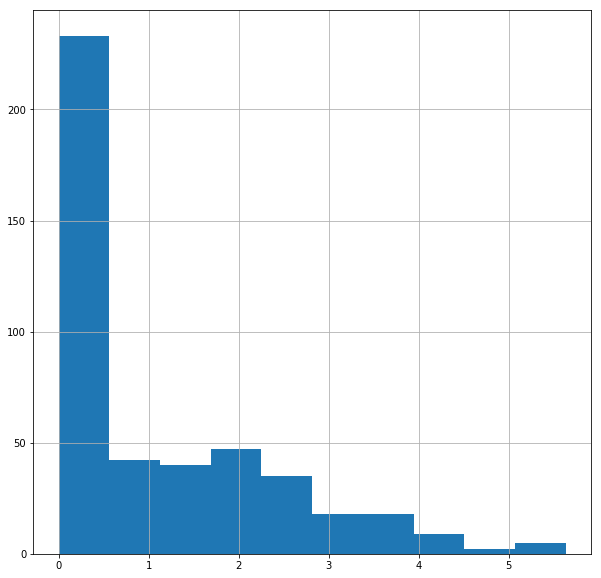

In [10]:
y.hist(figsize=(10,10)) 

In [11]:

print(y.shape)

fdata.pop("rain")
fdata.pop("month")
fdata.pop("day")



X=fdata

(449,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=40)

In [13]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
predictions = lr_model.predict(X_test)
#predictions=numpy.expm1(predictions)
#predictions=numpy.expm1(predictions)
    # Evaluate the model
rms = sqrt(mean_squared_error(y_test, predictions))
print(rms)

1.2718623780853002


In [15]:
from sklearn.model_selection import cross_val_score

lr_scores = cross_val_score( lr_model, X, y,
                         scoring='neg_mean_squared_error', cv=10)

lr_rmse_scores = numpy.sqrt(-lr_scores)
print(lr_rmse_scores.mean())

1.392033080840435


In [16]:
#print(X.describe())
rng = numpy.random.RandomState(10)

In [17]:

clf_1 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6),
                     n_estimators=50, random_state=rng)

clf_1.fit(X_train, y_train)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=<mtrand.RandomState object at 0x7fa5d8e73708>)

In [18]:
#X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=19)

In [19]:
predictions = clf_1.predict(X_test)
#predictions=numpy.expm1(predictions)
#predictions=numpy.expm1(predictions)
    # Evaluate the model
rms = sqrt(mean_squared_error(y_test, predictions))
print(rms)

1.3052591781433136


In [21]:
from sklearn.model_selection import cross_val_score

abr_scores = cross_val_score(clf_1, X, y,
                         scoring='neg_mean_squared_error', cv=10)

dtr_rmse_scores = numpy.sqrt(-abr_scores)
print(dtr_rmse_scores.mean())

1.4938320078368756


In [22]:
from sklearn.tree import DecisionTreeRegressor

clf_2 = DecisionTreeRegressor()
clf_2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [23]:
predictions = clf_2.predict(X_test)
#predictions=numpy.expm1(predictions)
#predictions=numpy.expm1(predictions)
    # Evaluate the model
rms = sqrt(mean_squared_error(y_test, predictions))
print(rms)

1.821642912597693


In [24]:
from sklearn.model_selection import cross_val_score

dtr_scores = cross_val_score(clf_2, X, y,
                         scoring='neg_mean_squared_error', cv=10)

dtr_rmse_scores = numpy.sqrt(-dtr_scores)
print(dtr_rmse_scores.mean())

2.1397631597167655


In [25]:
test=pandas.read_csv("test.csv")

In [ ]:
test.columns = ["Id", "x_coord", "y_coord", "month", "day", "ffmc", "dmc", "dc", "isi", "temp",
              "rh", "wind", "rain" ]

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

le_month = LabelEncoder()
test["month"] = le_month.fit_transform(test["month"])

le_day = LabelEncoder()
test["day"] = le_day.fit_transform(test["day"])



In [ ]:

test.pop("rain")
test.pop("month")
test.pop("day")
test.pop("Id")

test = (test - test.mean())/test.std()


In [ ]:
predictions = clf.predict(test)
predictions=numpy.expm1(predictions)
#predictions=numpy.expm1(predictions)
    # Evaluate the model
#rms = sqrt(mean_squared_error(y, predictions))
#model.score(X,Y)

    #mae = mean_absolute_error(predictions, Y)
   # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    #results.append(mae)
    #names.append(name)
    
    #msg = "%s: %f (%f)" % (name, score, mae)
    #print(msg)
#print(rms)
#predictions

In [ ]:
#ans=pandas.read_csv("ans.csv")
ans=pandas.read_csv("myteam.csv")
#sampleSubmission = .values
# print(ans)

#X =sampleSubmission[:,0:1]
raw_data={'area' : predictions}
#@ID={'Id':X}
#ans.insert(1,'area', predictions, allow_duplicates=True)
s = pandas.DataFrame(raw_data, columns = ['area'])
ans=pandas.concat([ans,s],axis=1)
#ans['area'] = predictions
ans.to_csv('myteam.csv')